In [1]:
# Import Dependencies
%matplotlib inline

# Start Python Imports
import math, time, random, datetime

# Data Manipulation
import numpy as np
import pandas as pd
import missingno

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

In [2]:
# Import train data 
train = pd.read_csv('general_data_total.csv')
train.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Emp_EnvironmentSatisfaction,Emp_JobSatisfaction,Emp_WorkLifeBalance,Man_JobInvolvement,Man_PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [3]:
len(train)

4410

<h1><span style="text-decoration: underline;"><strong>Attributes:</strong></span></h1>
<ul>
<li><strong>Age:&nbsp;</strong>Age of the employee</li>
<li><strong>Attrition:&nbsp;</strong>Whether the employee left in the previous year or not</li>
<li><strong>BusinessTravel:&nbsp;</strong>How frequently the employees traveled for business purposes in the last year</li>
<li><strong>Department:</strong> Department of the company</li>
<li><strong>DistanceFromHome:&nbsp;</strong>Distance from home in km</li>
<li><strong>Education:</strong> Education Levels
<ul>
<li>1 = 'Below College'</li>
<li>2 = 'College'</li>
<li>3 = 'Bachelor'</li>
<li>4 = 'Master'</li>
<li>5 = 'Doctor'</li>
</ul>
</li>
<li><strong>EducationField:</strong> Field of education</li>
<li><strong>EmployeeCount:</strong> Employee count</li>
<li><strong>EmployeeID:</strong> Employee number/id</li>
<li><strong>Gender:</strong> Gender of employee</li>
<li><strong>JobLevel:</strong> Job level at the company on a scale of 1 to 5</li>
<li><strong>JobRole:</strong> Name of the job role in the company</li>
<li><strong>MaritalStatus:</strong> Marital status of the employee</li>
<li><strong>MonthlyIncome:</strong> Monthly income per month</li>
<li><strong>NumCompaniesWorked:</strong> Total number of companies the employee has worked for</li>
<li><strong>Over18:</strong> Whether the employee is above 18 years of age or not</li>
<li><strong>PercentSalaryHike:</strong> Percent salary hike for last year</li>
<li><strong>StandardHours:</strong> Standard hours of work for the employee</li>
<li><strong>StockOptionLevel:</strong> Stock options level of the employee</li>
<li><strong>TotalWorkingYears:</strong> Total number of years the employee has worked so far</li>
<li><strong>TrainingTimesLastYear:</strong> Number of times training was conducted for this employee last year</li>
<li><strong>YearsAtCompany:</strong> Total number of years spent at the company by the employee</li>
<li><strong>YearsSinceLastPromotion:</strong> Number of years since the last promotion</li>
<li><strong>YearsWithCurrManager:</strong> Number of years under current manager</li>
<li><strong>Emp_EnvironmentSatisfaction:</strong> Work Environment Satisfaction Level
<ul>
<li>1 = 'Low'</li>
<li>2 = 'Medium'</li>
<li>3 = 'High'</li>
<li>4 = 'Very High'</li>
</ul>
</li>
<li><strong>Emp_JobSatisfaction:</strong> Job Satisfaction Level
<ul>
<li>1 = 'Low'</li>
<li>2 = 'Medium'</li>
<li>3 = 'High'</li>
<li>4 = 'Very High'</li>
</ul>
</li>
<li><strong>Emp_WorkLifeBalance:</strong> Work-life balance level
<ul>
<li>1 = 'Bad'</li>
<li>2 = 'Good'</li>
<li>3 = 'Better'</li>
<li>4 = 'Best'</li>
</ul>
</li>
<li><strong>Man_JobInvolvement:</strong> Job Involvement Level from Manager perspective
<ul>
<li>1 = 'Low'</li>
<li>2 = 'Medium'</li>
<li>3 = 'High'</li>
<li>4 = 'Very High'</li>
</ul>
</li>
<li><strong>Man_PerformanceRating:&nbsp;</strong>Performance rating for last year
<ul>
<li>1 = 'Low'</li>
<li>2 = 'Good'</li>
<li>3 = 'Excellent'</li>
<li>4 = 'Outstanding'</li>
</ul>
</li>
</ul>    

In [4]:
# Take a look to the high-level summary of the attributes of the given column with Pandas method describe()
train.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Emp_EnvironmentSatisfaction,Emp_JobSatisfaction,Emp_WorkLifeBalance,Man_JobInvolvement,Man_PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


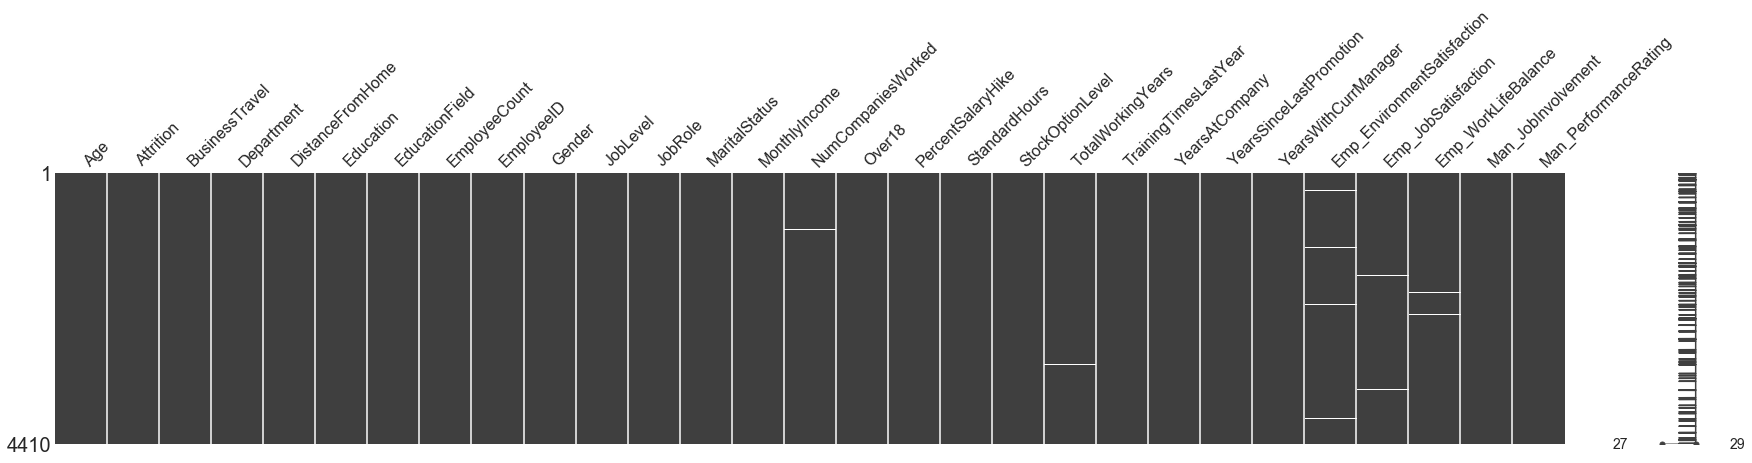

In [5]:
# Analize if there are missing values with the missingno Python library
missingno.matrix(train, figsize = (30,5))

In [6]:
# Check what are the columns inside the train dataframe 
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Emp_EnvironmentSatisfaction', 'Emp_JobSatisfaction',
       'Emp_WorkLifeBalance', 'Man_JobInvolvement', 'Man_PerformanceRating'],
      dtype='object')

In [7]:
# Just to double check a function is created to do the count on missing values
def find_missing_values(dataset, columns):
    missing_values = {}
    print('Missing Values per column')
    ds_length = len(dataset)
    for column in columns:
        total_column_values = dataset[column].value_counts().sum()
        missing_values[column] = ds_length - total_column_values
        
    return missing_values

missing_vals = find_missing_values(train, columns=train.columns)
missing_vals

Missing Values per column


{'Age': 0,
 'Attrition': 0,
 'BusinessTravel': 0,
 'Department': 0,
 'DistanceFromHome': 0,
 'Education': 0,
 'EducationField': 0,
 'EmployeeCount': 0,
 'EmployeeID': 0,
 'Gender': 0,
 'JobLevel': 0,
 'JobRole': 0,
 'MaritalStatus': 0,
 'MonthlyIncome': 0,
 'NumCompaniesWorked': 19,
 'Over18': 0,
 'PercentSalaryHike': 0,
 'StandardHours': 0,
 'StockOptionLevel': 0,
 'TotalWorkingYears': 9,
 'TrainingTimesLastYear': 0,
 'YearsAtCompany': 0,
 'YearsSinceLastPromotion': 0,
 'YearsWithCurrManager': 0,
 'Emp_EnvironmentSatisfaction': 25,
 'Emp_JobSatisfaction': 20,
 'Emp_WorkLifeBalance': 38,
 'Man_JobInvolvement': 0,
 'Man_PerformanceRating': 0}

In [8]:
# Since there are few  missing values per column, I will drop those values
train = train.dropna(subset=['NumCompaniesWorked', 'TotalWorkingYears', 'Emp_EnvironmentSatisfaction', 'Emp_JobSatisfaction', 'Emp_WorkLifeBalance'])

missing_vals = find_missing_values(train, columns=train.columns)
missing_vals

Missing Values per column


{'Age': 0,
 'Attrition': 0,
 'BusinessTravel': 0,
 'Department': 0,
 'DistanceFromHome': 0,
 'Education': 0,
 'EducationField': 0,
 'EmployeeCount': 0,
 'EmployeeID': 0,
 'Gender': 0,
 'JobLevel': 0,
 'JobRole': 0,
 'MaritalStatus': 0,
 'MonthlyIncome': 0,
 'NumCompaniesWorked': 0,
 'Over18': 0,
 'PercentSalaryHike': 0,
 'StandardHours': 0,
 'StockOptionLevel': 0,
 'TotalWorkingYears': 0,
 'TrainingTimesLastYear': 0,
 'YearsAtCompany': 0,
 'YearsSinceLastPromotion': 0,
 'YearsWithCurrManager': 0,
 'Emp_EnvironmentSatisfaction': 0,
 'Emp_JobSatisfaction': 0,
 'Emp_WorkLifeBalance': 0,
 'Man_JobInvolvement': 0,
 'Man_PerformanceRating': 0}

In [9]:
# Check the data type for each column inside the train dataframe
train.dtypes

Age                              int64
Attrition                       object
BusinessTravel                  object
Department                      object
DistanceFromHome                 int64
Education                        int64
EducationField                  object
EmployeeCount                    int64
EmployeeID                       int64
Gender                          object
JobLevel                         int64
JobRole                         object
MaritalStatus                   object
MonthlyIncome                    int64
NumCompaniesWorked             float64
Over18                          object
PercentSalaryHike                int64
StandardHours                    int64
StockOptionLevel                 int64
TotalWorkingYears              float64
TrainingTimesLastYear            int64
YearsAtCompany                   int64
YearsSinceLastPromotion          int64
YearsWithCurrManager             int64
Emp_EnvironmentSatisfaction    float64
Emp_JobSatisfaction      

In [10]:
# Create two new dataframes to analyze the data and compare
df_dis = pd.DataFrame() # for discretized continuous variables
df_con = pd.DataFrame() # for continuous variables

No     3605
Yes     695
Name: Attrition, dtype: int64


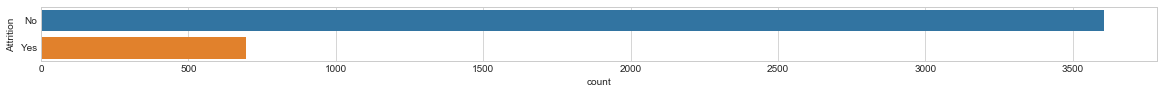

In [11]:
# Check with a graph and count the attritions (Whether the employee left in the previous year or not)
# I am using Seaborn that is a Python data visualization library based on matplotlib.
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Attrition', data=train);
print(train.Attrition.value_counts())

In [12]:
# Add analyzed column to the new dataframes
# Convert attrition "Yes" and "No" values to numerical values
df_dis['Attrition'] = train['Attrition']
df_dis['Attrition'] = np.where(df_dis['Attrition'] == 'Yes', 1, 0) # change attrition value No = 0 and Yes = 1

df_con['Attrition'] = train['Attrition']
df_dis.head()

,Attrition
0,0
1,1
2,0
3,0
4,0


In [13]:
df_con['EmployeeID'] = train['EmployeeID']
df_dis['EmployeeID'] = train['EmployeeID']

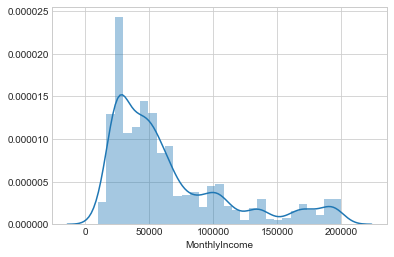

In [14]:
# Check with a graph the Monthly Income
sns.distplot(train.MonthlyIncome)

<h2>How does an employee's monthly income affects his decision to leave the company?</h2>

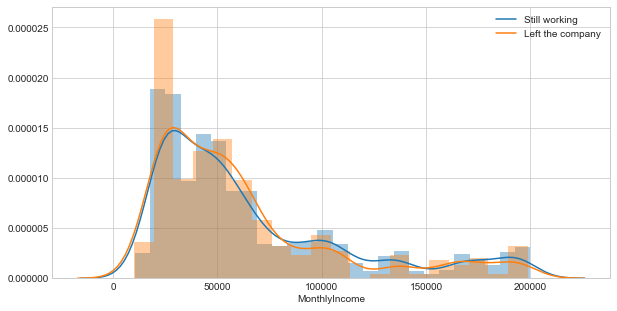

In [15]:
# Add analyzed column to the new dataframes
df_con['MonthlyIncome'] = train['MonthlyIncome']
df_dis['MonthlyIncome'] = train['MonthlyIncome']

# How does the Monthly Income looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['MonthlyIncome'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['MonthlyIncome'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The employees are prone to leave the company when the salary is low.</span></p>

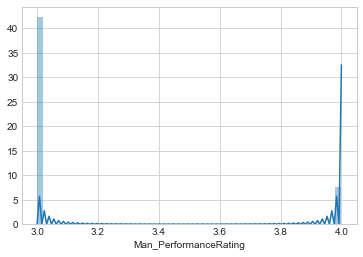

In [16]:
# Check with a graph the Performance Rating
sns.distplot(train.Man_PerformanceRating)

<h2>How does an employee's performance rating affects his decision to leave the company?</h2>

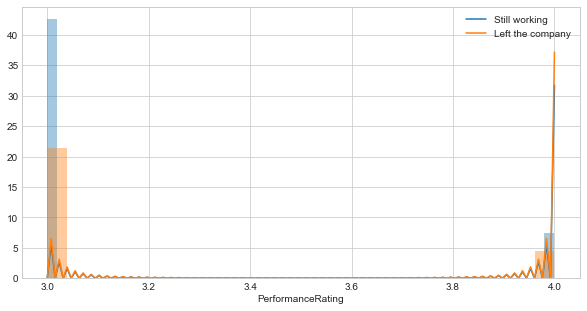

In [17]:
# Add analyzed column to the new dataframes
df_con['PerformanceRating'] = train['Man_PerformanceRating']
df_dis['PerformanceRating'] = train['Man_PerformanceRating']

# How does the Performance Rating looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['PerformanceRating'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['PerformanceRating'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The performance rating are all "Excellent" and "Outstanding". The information provided by this feature does not provide a significant value.</span></p>

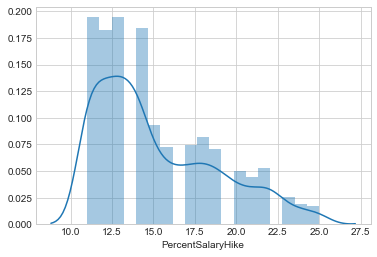

In [18]:
# Check with a graph the Performance Rating
sns.distplot(train.PercentSalaryHike)

<h2>How does an employee's salary hike affects his decision to leave the company?</h2>

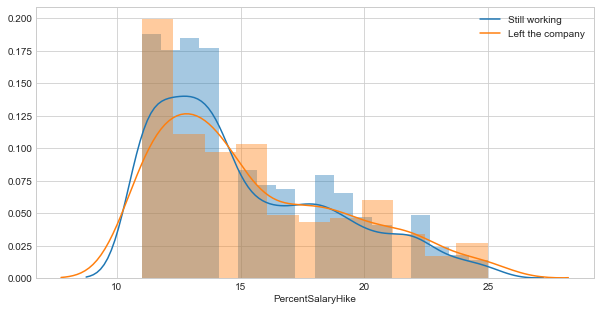

In [19]:
# Add analyzed column to the new dataframes
df_con['PercentSalaryHike'] = train['PercentSalaryHike']
df_dis['PercentSalaryHike'] = train['PercentSalaryHike']

# How does the Percentage Salary Hike per year looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['PercentSalaryHike'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['PercentSalaryHike'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The comparison give us the idea that employees are not satisfied with their Salary Hike. Maybe the highest percentages were applied to very low incomes and it was not enough to retain the employee</span></p>

Sales Executive              956
Research Scientist           859
Laboratory Technician        757
Manufacturing Director       422
Healthcare Representative    377
Manager                      299
Sales Representative         241
Research Director            235
Human Resources              154
Name: JobRole, dtype: int64


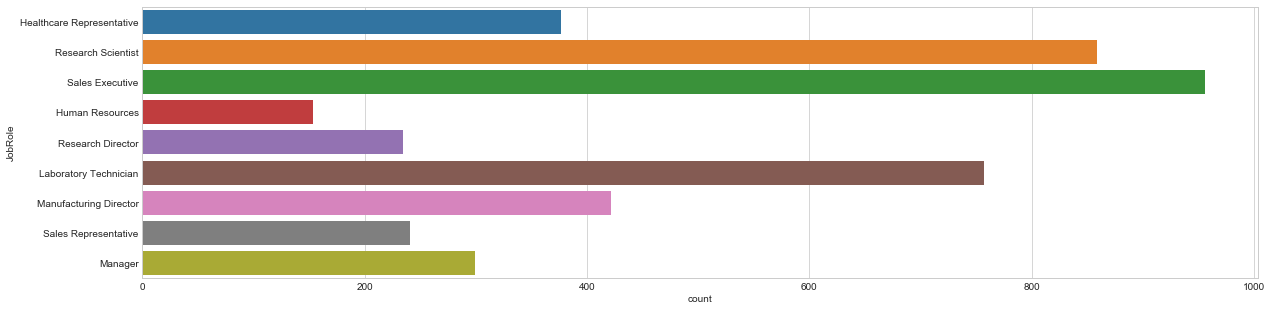

In [20]:
# Check with a graph the Job Role
fig = plt.figure(figsize=(20,5))
sns.countplot(y='JobRole', data=train);
print(train.JobRole.value_counts())

In [21]:
df_job_one_hot = pd.get_dummies(train['JobRole'])

# Add analyzed column to the new dataframes
df_con['JobRole'] = train['JobRole']
df_dis['JR_HealthRep'] = df_job_one_hot['Healthcare Representative']
df_dis['JR_HHRR'] = df_job_one_hot['Human Resources']
df_dis['JR_LabTec'] = df_job_one_hot['Laboratory Technician']
df_dis['JR_Man'] = df_job_one_hot['Manager']
df_dis['JR_MftDir'] = df_job_one_hot['Manufacturing Director']
df_dis['JR_ResDir'] = df_job_one_hot['Research Director']
df_dis['JR_ResSci'] = df_job_one_hot['Research Scientist']
df_dis['JR_SaleExc'] = df_job_one_hot['Sales Executive']
df_dis['JR_SaleRep'] = df_job_one_hot['Sales Representative']

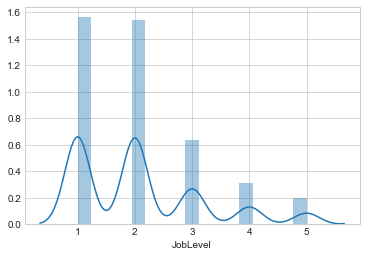

In [22]:
# Check with a graph the Job Level
sns.distplot(train.JobLevel)

<h2>How does an employee's Job Level affects his decision to leave the company?</h2>

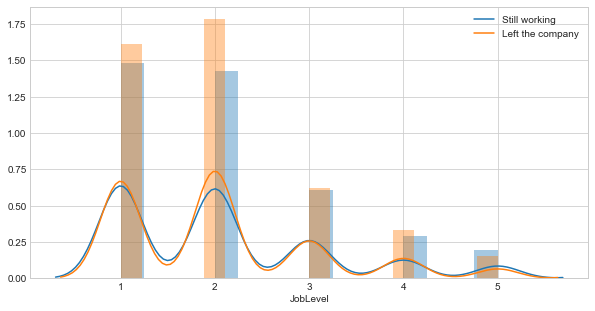

In [23]:
# Add analyzed column to the new dataframes
df_con['JobLevel'] = train['JobLevel']
df_dis['JobLevel'] = train['JobLevel']

# How does the Job Level looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['JobLevel'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['JobLevel'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">Even though the attrition rate is high at all Job Levels, the employees are prone to leave the company when the Job Level is low.</span></p>

Male      2571
Female    1729
Name: Gender, dtype: int64


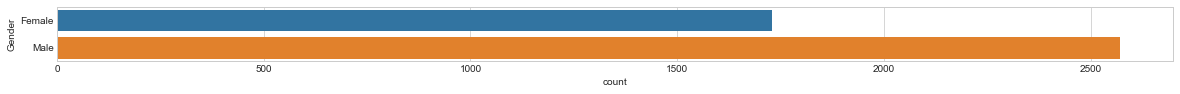

In [24]:
# Check with a graph the Gender
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Gender', data=train);
print(train.Gender.value_counts())

<h2>How does an employee's Gender affects his decision to leave the company?</h2>

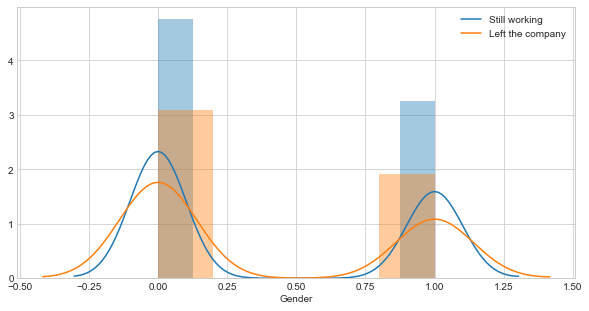

In [25]:
# Add analyzed column to the new dataframes
# Convert Gender "Female" and "Male" values to numerical values
df_dis['Gender'] = train['Gender']
df_dis['Gender'] = np.where(df_dis['Gender'] == 'Female', 1, 0) # change attrition value Male = 0 and Female = 1

df_con['Gender'] = train['Gender']

# How does the Gender looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['Gender'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['Gender'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The ratio of men leaving the company is higher than the reatio of women leaving the company.</span></p>

3    1670
4    1168
2     823
1     499
5     140
Name: Education, dtype: int64


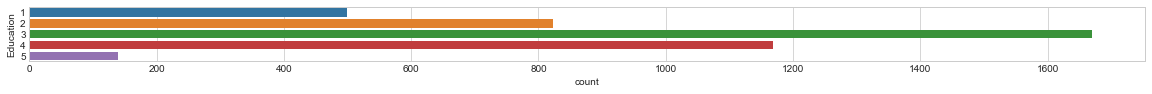

In [26]:
# Check with a graph the Education
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Education', data=train);
print(train.Education.value_counts())

<h2>How does an employee's Education affects his decision to leave the company?</h2>

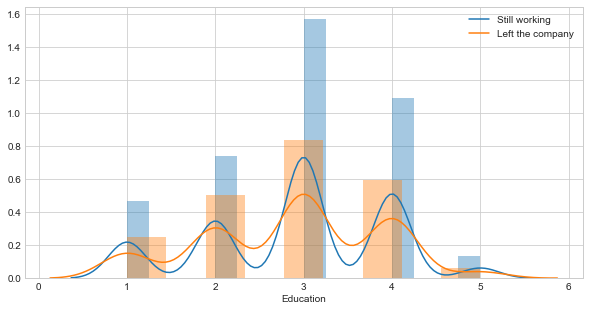

In [27]:
# Add analyzed column to the new dataframes
df_con['Education'] = train['Education']
df_dis['Education'] = train['Education']

# How does the Education looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['Education'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['Education'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The ratio of employees leaving the company is higher when they are less educated.</span></p>

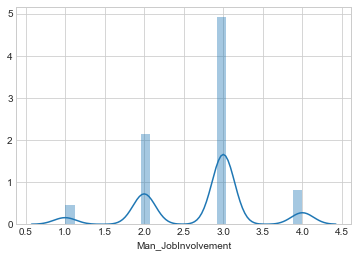

In [28]:
# Check with a graph the Job Involvement
sns.distplot(train.Man_JobInvolvement)

<h2>How does an employee's Job Involvement affects his decision to leave the company?</h2>

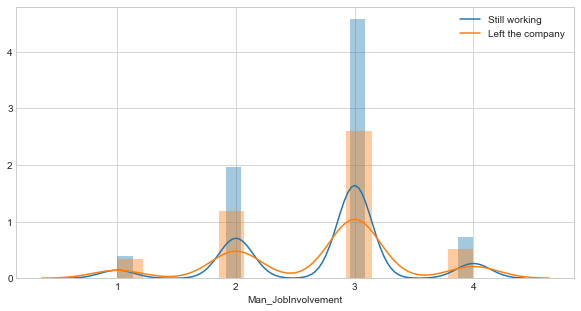

In [29]:
# Add analyzed column to the new dataframes
df_con['Man_JobInvolvement'] = train['Man_JobInvolvement']
df_dis['Man_JobInvolvement'] = train['Man_JobInvolvement']

# How does the Education looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['Man_JobInvolvement'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['Man_JobInvolvement'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The ratio of employees leaving the company is higher when they are less engaged with the company.</span></p>

Y    4300
Name: Over18, dtype: int64


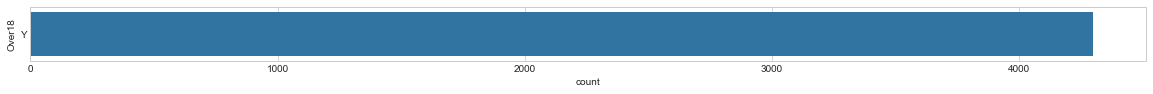

In [30]:
# Check with a graph the Over 18 years old
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Over18', data=train);
print(train.Over18.value_counts())

<p><span style="color: #ff6600;">As all the population is over 18 years old, this is not an important parameter</span></p>

Married     1969
Single      1382
Divorced     949
Name: MaritalStatus, dtype: int64


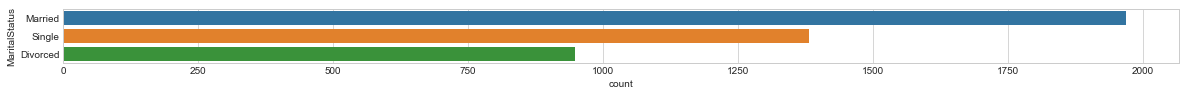

In [31]:
# Check with a graph the Marital Status
fig = plt.figure(figsize=(20,1))
sns.countplot(y='MaritalStatus', data=train);
print(train.MaritalStatus.value_counts())

In [32]:
# Create a function to discretize the data for Marital Status with numerical values
# Add analyzed column to the new dataframes
def maritalStatus(row):
    if row.MaritalStatus == 'Married':
        return 1
    elif row.MaritalStatus == 'Single':
        return 2
    elif row.MaritalStatus == 'Divorced':
        return 3
    
df_marStat = pd.DataFrame({'MaritalStatus': train.apply(maritalStatus, axis='columns')})


<h2>How does an employee's Marital Status affects his decision to leave the company?</h2>

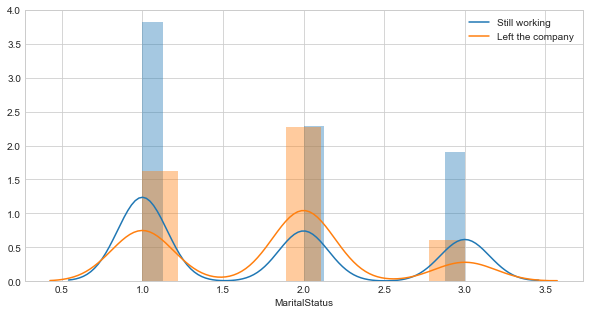

In [33]:
# Add analyzed column to the new dataframes
df_con['MaritalStatus'] = train['MaritalStatus']
df_dis['MaritalStatus'] = df_marStat['MaritalStatus']

# How does the Marital Status looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['MaritalStatus'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['MaritalStatus'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">Single employees are prone to leave the company</span></p>

8    4300
Name: StandardHours, dtype: int64


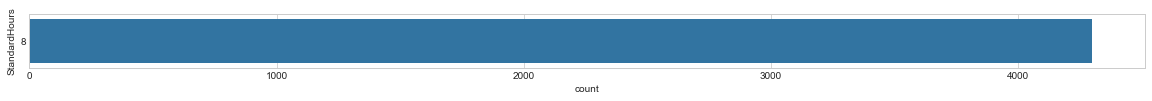

In [34]:
# Check with a graph the Standard Hours worked
fig = plt.figure(figsize=(20,1))
sns.countplot(y='StandardHours', data=train);
print(train.StandardHours.value_counts())

<p><span style="color: #ff6600;">Since the standard hours is 8 hours for all the population, this is not an important parameter</span></p>

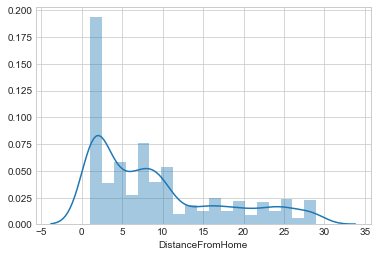

In [35]:
# Check with a graph the Distance from Home
sns.distplot(train.DistanceFromHome)

In [36]:
# Create a function to discretize the data for Distance from Home grouping them by categories
# Add analyzed column to the new dataframes
def distance(row):
    if row.DistanceFromHome >= 0 and row.DistanceFromHome < 5:
        return 0
    elif row.DistanceFromHome >= 5 and row.DistanceFromHome < 10:
        return 1
    elif row.DistanceFromHome >= 10 and row.DistanceFromHome < 15:
        return 2
    elif row.DistanceFromHome >= 15 and row.DistanceFromHome < 20:
        return 3
    elif row.DistanceFromHome >= 20 and row.DistanceFromHome < 25:
        return 4
    elif row.DistanceFromHome >= 25 and row.DistanceFromHome < 30:
        return 5
    else:
        return 6
    
df_distance = pd.DataFrame({'DistanceFromHome': train.apply(distance, axis='columns')})
df_distance.head()

,DistanceFromHome
0,1
1,2
2,3
3,0
4,2


<h2>How does an employee's Distance from Home affects his decision to leave the company?</h2>

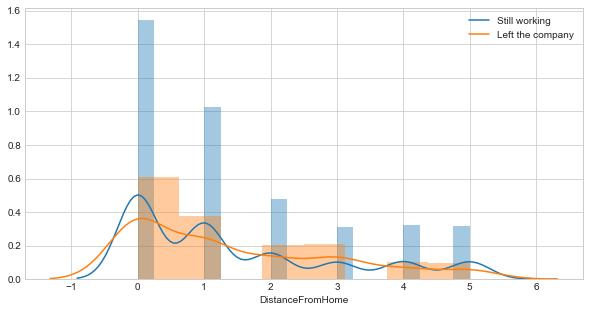

In [37]:
# Add analyzed column to the new dataframes
df_con['DistanceFromHome'] = train['DistanceFromHome']
df_dis['DistanceFromHome'] = df_distance['DistanceFromHome']

# How does the Marital Status looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['DistanceFromHome'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['DistanceFromHome'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The employees are prone to leave the company when they live far from the office</span></p>

0    1846
1    1738
2     466
3     250
Name: StockOptionLevel, dtype: int64


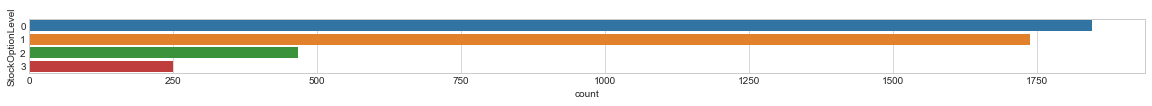

In [38]:
# Check with a graph the Stock Option level
fig = plt.figure(figsize=(20,1))
sns.countplot(y='StockOptionLevel', data=train);
print(train.StockOptionLevel.value_counts())

<h2>How does an employee's Stock options affects his decision to leave the company?</h2>

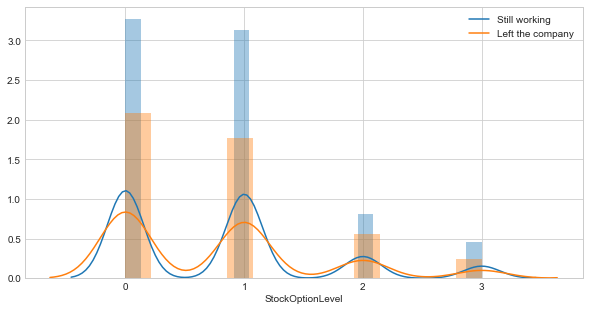

In [39]:
# Add analyzed column to the new dataframes
df_con['StockOptionLevel'] = train['StockOptionLevel']
df_dis['StockOptionLevel'] = train['StockOptionLevel']

# How does the Stock Options looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['StockOptionLevel'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['StockOptionLevel'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The rate of employees leaving the company is higher when the Stock Option level is higher</span></p>

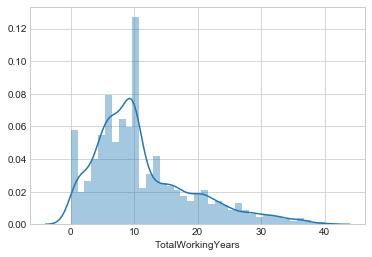

In [40]:
# Check with a graph the Total Working Years
sns.distplot(train.TotalWorkingYears)

In [41]:
# Create a function to discretize the data for Total Working Years grouping them by categories
# Add analyzed column to the new dataframes
def work_years(row):
    if row.TotalWorkingYears >= 0 and row.TotalWorkingYears < 10:
        return 0
    elif row.TotalWorkingYears >= 10 and row.TotalWorkingYears < 20:
        return 1
    elif row.TotalWorkingYears >= 20 and row.TotalWorkingYears < 30:
        return 2
    elif row.TotalWorkingYears >= 30 and row.TotalWorkingYears <= 40:
        return 3
    else:
        return 4
    
df_work_years = pd.DataFrame({'TotalWorkingYears': train.apply(work_years, axis='columns')})
df_work_years.head()

,TotalWorkingYears
0,0
1,0
2,0
3,1
4,0


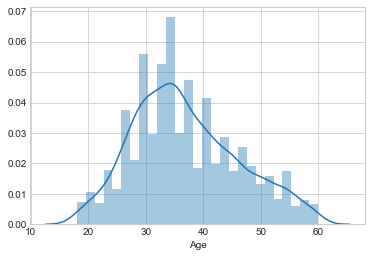

In [42]:
# Check with a graph the Age
sns.distplot(train.Age)

<h2>What is the relationship between an employee's Age and the Total Working Years?</h2>

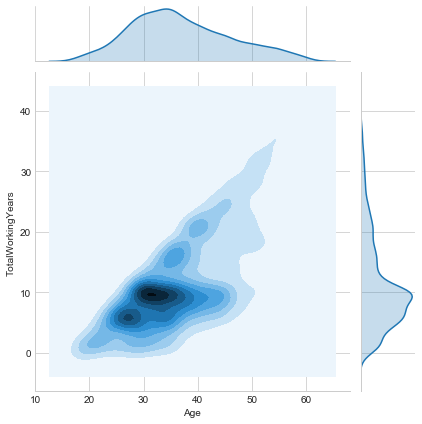

In [43]:
# Check the relationship between Age and Total Working Years
sns.jointplot(x="Age", y="TotalWorkingYears", kind="kde", data=train);

<p><span style="color: #ff6600;">Younger employees worked less years</span></p>

In [44]:
# Create a function to discretize the data for Age grouping them by categories
# Add analyzed column to the new dataframes
def age_gen(row):
    if row.Age >= 0 and row.Age <= 21:       #Post-Millennials
        return 0
    elif row.Age >= 22 and row.Age <= 37:    #Millennials
        return 1
    elif row.Age >= 38 and row.Age <= 53:    #Generation X    
        return 2
    elif row.Age >= 54 and row.Age <= 72:    #Baby Boomers
        return 3
    else:                                    #The Silent Generation
        return 4                                                        
    
df_Age = pd.DataFrame({'Age': train.apply(age_gen, axis='columns')})
df_Age.head()

,Age
0,2
1,1
2,1
3,2
4,1


<h2>How does an employee's Total Working Years and Age affects his decision to leave the company?</h2>

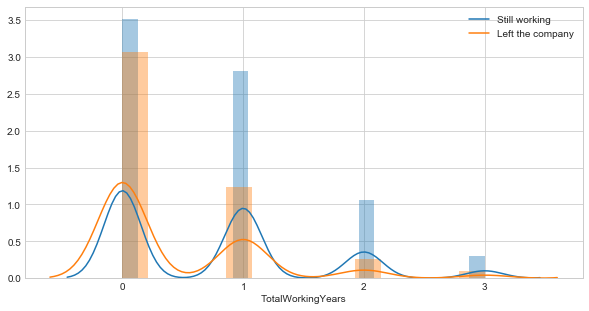

In [45]:
# Add analyzed column to the new dataframes
df_con['TotalWorkingYears'] = train['TotalWorkingYears']
df_dis['TotalWorkingYears'] = df_work_years['TotalWorkingYears']

# How does the Marital Status looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['TotalWorkingYears'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['TotalWorkingYears'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The employees are prone to leave the company when they worked less than 10 years.</span></p>

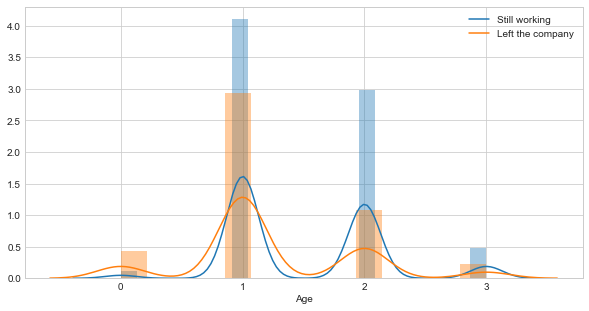

In [46]:
# Add analyzed column to the new dataframes
df_con['Age'] = train['Age']
df_dis['Age'] = df_Age['Age']

# How does the Marital Status looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['Age'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['Age'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The employees are prone to leave the company when they are young.</span></p>

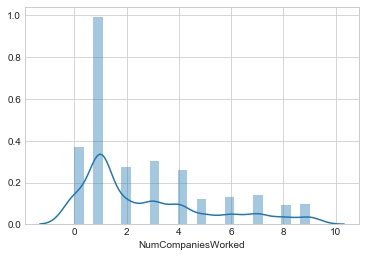

In [47]:
# Check with a graph the Number of Companies Worked
sns.distplot(train.NumCompaniesWorked)

In [48]:
# Create a function to discretize the data for Number of Companies Worked grouping them by categories
# Add analyzed column to the new dataframes
def comp_worked(row):
    if row.NumCompaniesWorked >= 0 and row.NumCompaniesWorked < 2:      #Worked in less than 2 companies
        return 0
    elif row.NumCompaniesWorked >= 2 and row.NumCompaniesWorked < 4:    #Worked in 2 or 3 companies
        return 1
    elif row.NumCompaniesWorked >= 4 and row.NumCompaniesWorked < 6:    #Worked in 4 or 5 companies
        return 2
    elif row.NumCompaniesWorked >= 6 and row.NumCompaniesWorked < 8:    #Worked in 6 or 7 companies
        return 3
    else:                                                               #Worked in more than 8 companies
        return 4                                                        
    
df_comp_worked = pd.DataFrame({'NumCompaniesWorked': train.apply(comp_worked, axis='columns')})
df_comp_worked.head()

,NumCompaniesWorked
0,0
1,0
2,0
3,1
4,2


<h2>How does the number of companies where an employee has worked before affects his decision to leave the company?</h2>

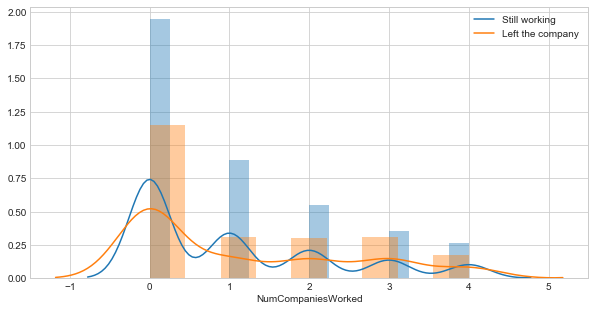

In [49]:
# Add analyzed column to the new dataframes
df_con['NumCompaniesWorked'] = train['NumCompaniesWorked']
df_dis['NumCompaniesWorked'] = df_comp_worked['NumCompaniesWorked']

# How does the Marital Status looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['NumCompaniesWorked'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['NumCompaniesWorked'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The employees are prone to leave the company when they had worked in more than 5 companies</span></p>

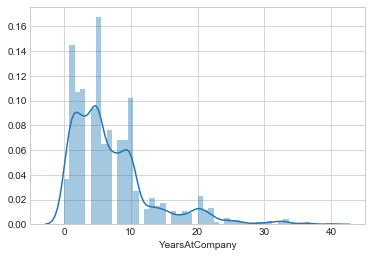

In [50]:
# Check with a graph the Employee Environment Satisfaction
sns.distplot(train.YearsAtCompany)

<h2>How does the years an employee worked at the company affects his decision to leave the company?</h2>

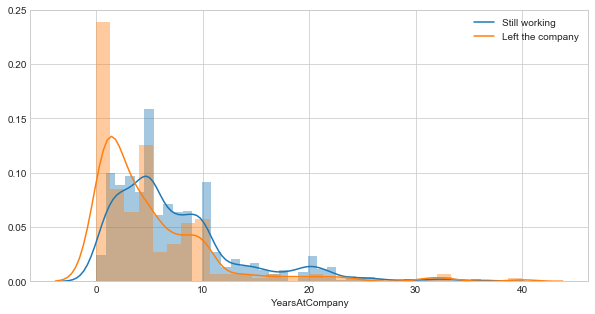

In [51]:
# Add analyzed column to the new dataframes
df_con['YearsAtCompany'] = train['YearsAtCompany']
df_dis['YearsAtCompany'] = train['YearsAtCompany']

# How does the Years at company looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['YearsAtCompany'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['YearsAtCompany'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The employees who worked less years at the company are prone to leave the company</span></p>

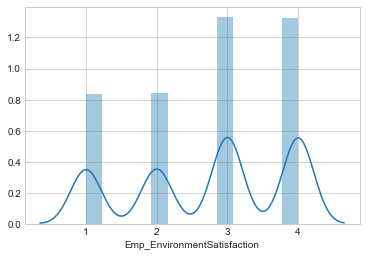

In [52]:
# Check with a graph the Employee Environment Satisfaction
sns.distplot(train.Emp_EnvironmentSatisfaction)

<h2>How does an employee's environment satisfaction affects his decision to leave the company?</h2>

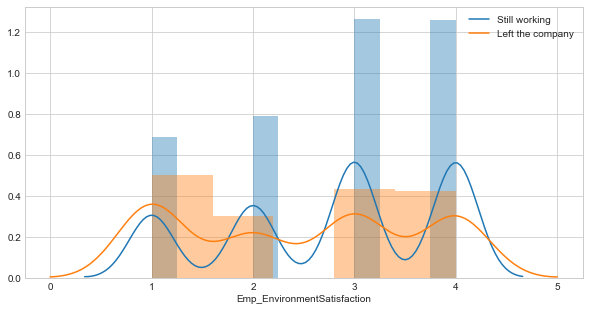

In [53]:
# Add analyzed column to the new dataframes
df_con['Emp_EnvironmentSatisfaction'] = train['Emp_EnvironmentSatisfaction']
df_dis['Emp_EnvironmentSatisfaction'] = train['Emp_EnvironmentSatisfaction']

# How does the Marital Status looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['Emp_EnvironmentSatisfaction'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['Emp_EnvironmentSatisfaction'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The employees are prone to leave the company when their environment satisfaction is low</span></p>

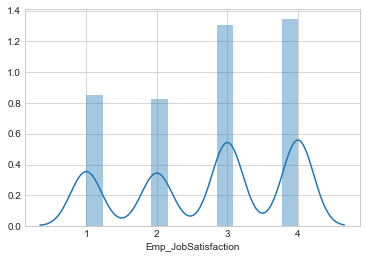

In [54]:
# Check with a graph the Employee Job Satisfaction
sns.distplot(train.Emp_JobSatisfaction)

<h2>How does an employee's Job Satisfaction affects his decision to leave the company?</h2>

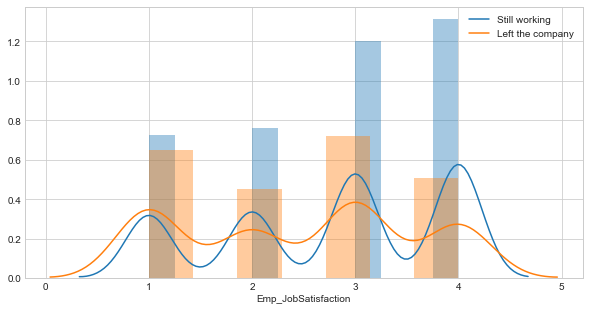

In [55]:
# Add analyzed column to the new dataframes
df_con['Emp_JobSatisfaction'] = train['Emp_JobSatisfaction']
df_dis['Emp_JobSatisfaction'] = train['Emp_JobSatisfaction']

# How does the Job Satisfaction looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['Emp_JobSatisfaction'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['Emp_JobSatisfaction'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The employees are prone to leave the company when their job satisfaction is low</span></p>

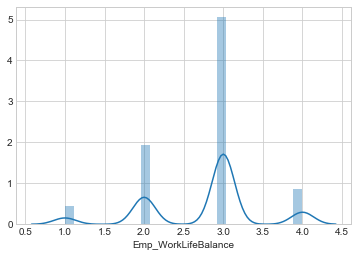

In [56]:
# Check with a graph the Employee Work-Life Balance
sns.distplot(train.Emp_WorkLifeBalance)

<h2>How does an employee's work-life balance affects his decision to leave the company?</h2>

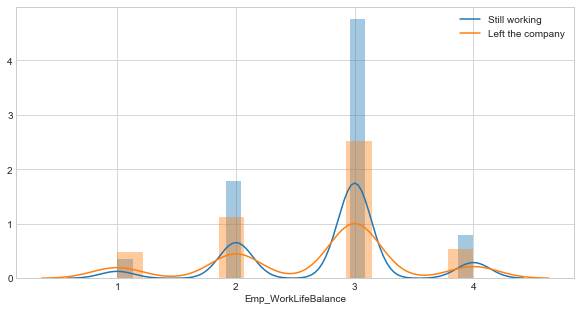

In [57]:
# Add analyzed column to the new dataframes
df_con['Emp_WorkLifeBalance'] = train['Emp_WorkLifeBalance']
df_dis['Emp_WorkLifeBalance'] = train['Emp_WorkLifeBalance']

# How does the Marital Status looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['Emp_WorkLifeBalance'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['Emp_WorkLifeBalance'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The employees are prone to leave the company when they work-life balance is low</span></p>

<h2>What is the relationship between the Marital Status and the Work-Life Balance?</h2>

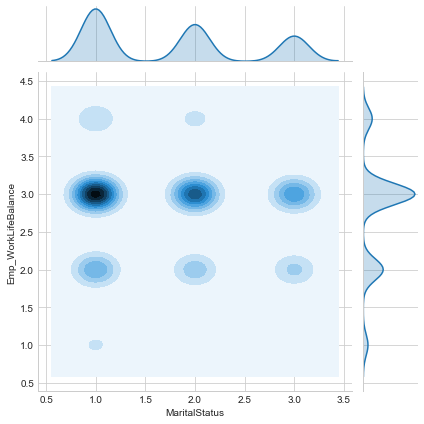

In [58]:
# Check the relationship between Marital Status and Work-life balance
sns.jointplot(x="MaritalStatus", y="Emp_WorkLifeBalance", kind="kde", data=df_dis);

<p><span style="color: #ff6600;">Married employees have a better work-life balance than Single and Divorced employees</span></p>

Research & Development    2807
Sales                     1307
Human Resources            186
Name: Department, dtype: int64


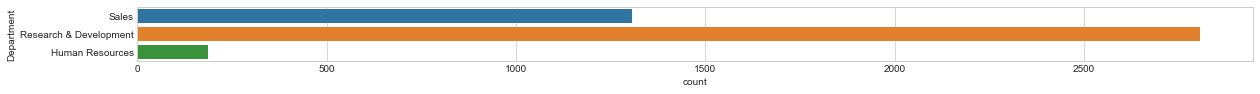

In [59]:
# Check with a graph the Employee Working Department
fig = plt.figure(figsize=(20,1))
sns.countplot(y='Department', data=train);
print(train.Department.value_counts())

Life Sciences       1766
Medical             1364
Marketing            469
Technical Degree     384
Other                237
Human Resources       80
Name: EducationField, dtype: int64


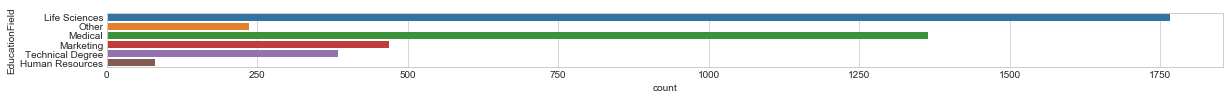

In [60]:
# Check with a graph the Employee Working Department
fig = plt.figure(figsize=(20,1))
sns.countplot(y='EducationField', data=train);
print(train.EducationField.value_counts())

<h2>How does an employee's Work Department & Education Field affects his decision to leave the company?</h2>

In [61]:
# One hot encode the categorical columns
#it takes a column which has categorical data, which has been label encoded, and then splits the column into multiple columns. 
#The numbers are replaced by 1s and 0s, depending on which column has what value.
df_dept_one_hot = pd.get_dummies(train['Department'], 
                                     prefix='Dept')

df_ed_one_hot = pd.get_dummies(train['EducationField'], 
                                     prefix='Ed')

df_ed_one_hot.head()

,Ed_Human Resources,Ed_Life Sciences,Ed_Marketing,Ed_Medical,Ed_Other,Ed_Technical Degree
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,0,0,0,1,0,0


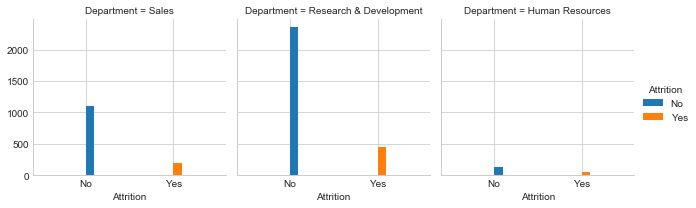

In [62]:
# Add analyzed column to the new dataframes
df_con['Department'] = train['Department']
df_dis['Dept_HHRR'] = df_dept_one_hot['Dept_Human Resources']
df_dis['Dept_R&Dev'] = df_dept_one_hot['Dept_Research & Development']
df_dis['Dept_Sales'] = df_dept_one_hot['Dept_Sales']
df_dis['Ed_HHRR'] = df_ed_one_hot['Ed_Human Resources']
df_dis['Ed_LifeSci'] = df_ed_one_hot['Ed_Life Sciences']
df_dis['Ed_Mktg'] = df_ed_one_hot['Ed_Marketing']
df_dis['Ed_Med'] = df_ed_one_hot['Ed_Medical']
df_dis['Ed_Tech'] = df_ed_one_hot['Ed_Technical Degree']
df_dis['Ed_Other'] = df_ed_one_hot['Ed_Other']

df_dis.head()

g = sns.FacetGrid(train, col="Department", hue="Attrition")
g.map(plt.hist, "Attrition", alpha=1);
g.add_legend();

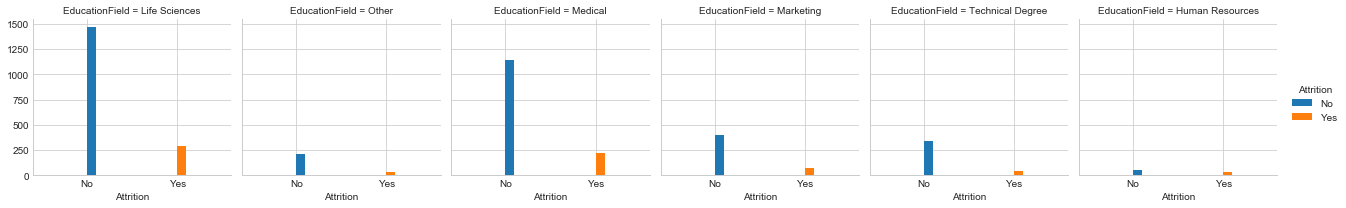

In [63]:
g = sns.FacetGrid(train, col="EducationField", hue="Attrition")
g.map(plt.hist, "Attrition", alpha=1);
g.add_legend();

<p><span style="color: #ff6600;">The employee's education field or working department doesn't seam to be a reason to leave the company</span></p>

Travel_Rarely        3051
Travel_Frequently     809
Non-Travel            440
Name: BusinessTravel, dtype: int64


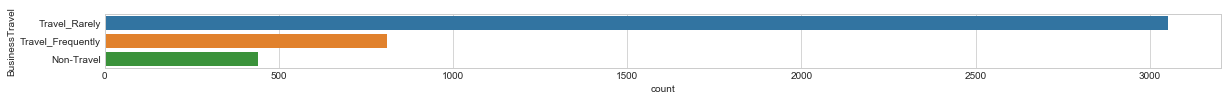

In [64]:
# Check with a graph the Business Travel
fig = plt.figure(figsize=(20,1))
sns.countplot(y='BusinessTravel', data=train);
print(train.BusinessTravel.value_counts())

<h2>How does an employee's Business Travel affects his decision to leave the company?</h2>

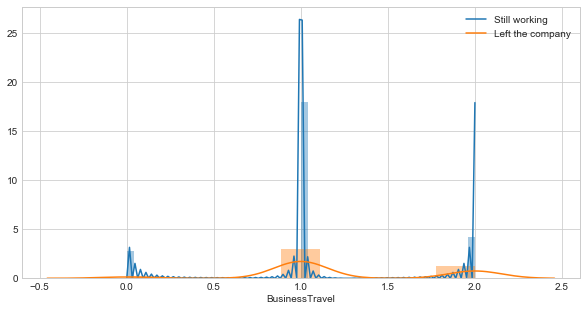

In [65]:
# Create a function to discretize the data for Business Travel with numerical values
# Add analyzed column to the new dataframes
def bussTravel(row):
    if row.BusinessTravel == 'Non-Travel':
        return 0
    elif row.BusinessTravel == 'Travel_Rarely':
        return 1
    elif row.BusinessTravel == 'Travel_Frequently':
        return 2
    
df_bussTravel = pd.DataFrame({'BusinessTravel': train.apply(bussTravel, axis='columns')})

# Add analyzed column to the new dataframes
df_con['BusinessTravel'] = train['BusinessTravel']
df_dis['BusinessTravel'] = df_bussTravel['BusinessTravel']

# How does the Business Travel looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['BusinessTravel'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['BusinessTravel'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The posibility or obligation to travel for work does not seams to be a reason to leave the company.</span></p>

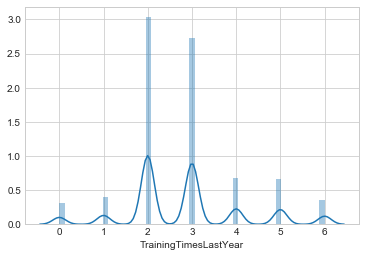

In [66]:
# Check with a graph the number of Training Last Year
sns.distplot(train.TrainingTimesLastYear)

<h2>How does the amount of trainings that an employee have affects his decision to leave the company?</h2>

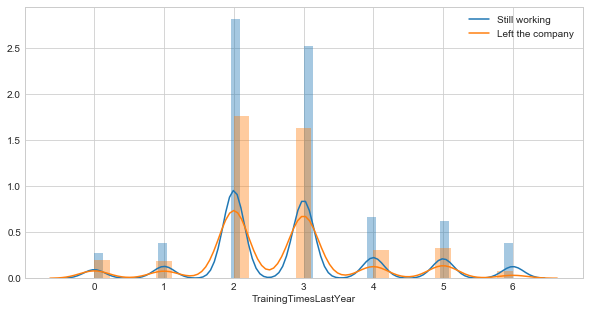

In [67]:
# Add analyzed column to the new dataframes
df_con['TrainingTimesLastYear'] = train['TrainingTimesLastYear']
df_dis['TrainingTimesLastYear'] = train['TrainingTimesLastYear']

# How does the number of Training Last Year looks compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['TrainingTimesLastYear'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['TrainingTimesLastYear'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The relationship between the number of trainings that an employee have does not look conclusive. A quick conclusion could be that employees are prone to leave the company when they have few or to many trainings</span></p>

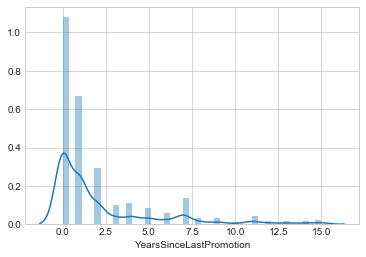

In [68]:
# Check with a graph the Years since Last Promotion
sns.distplot(train.YearsSinceLastPromotion)

<h2>How does the years since an employee last promotion affects his decision to leave the company?</h2>

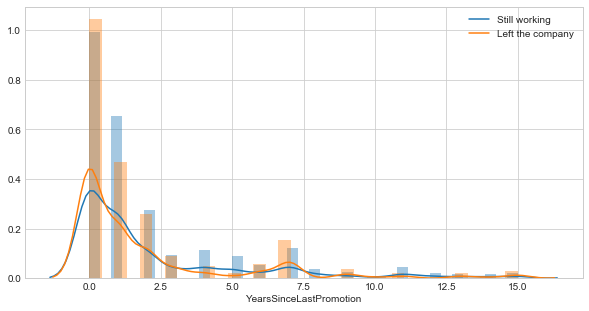

In [69]:
# Add analyzed column to the new dataframes
df_con['YearsSinceLastPromotion'] = train['YearsSinceLastPromotion']
df_dis['YearsSinceLastPromotion'] = train['YearsSinceLastPromotion']

# How does the Years since Last Promotion compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['YearsSinceLastPromotion'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['YearsSinceLastPromotion'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The relationship between the Years since the last promotion and the decision to leave the company is not conclusive.</span></p>
<p><span style="color: #ff6600;">There is a high attrition rate when the employee got a promotion in the year. There is also a high attrition rate when the employee didn't got a promotion for a long time</span></p>

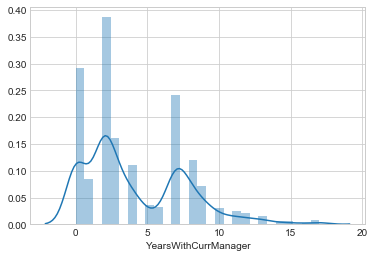

In [70]:
# Check with a graph the Years with current manager
sns.distplot(train.YearsWithCurrManager)

<h2>How does the years with the current manager affects the employee decision to leave the company?</h2>

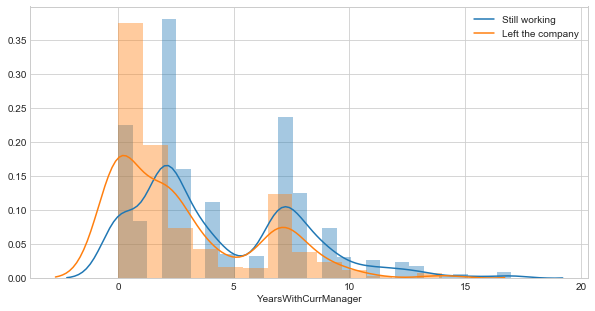

In [71]:
# Add analyzed column to the new dataframes
df_con['YearsWithCurrManager'] = train['YearsWithCurrManager']
df_dis['YearsWithCurrManager'] = train['YearsWithCurrManager']

# How does the Years with current manager compared to Attrition?
fig = plt.figure(figsize=(10, 5))
sns.distplot(df_dis.loc[df_dis['Attrition'] == (0)]['YearsWithCurrManager'], kde_kws={'label': 'Still working'});
sns.distplot(df_dis.loc[df_dis['Attrition'] == (1)]['YearsWithCurrManager'], kde_kws={'label': 'Left the company'});

<p><span style="color: #ff6600;">The employees are prone to leave the company during the first years with their managers</span></p>

In [72]:
df_dis.head()

,Attrition,EmployeeID,MonthlyIncome,PerformanceRating,PercentSalaryHike,JR_HealthRep,JR_HHRR,JR_LabTec,JR_Man,JR_MftDir,...,Ed_HHRR,Ed_LifeSci,Ed_Mktg,Ed_Med,Ed_Tech,Ed_Other,BusinessTravel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,131160,3,11,1,0,0,0,0,...,0,1,0,0,0,0,1,6,0,0
1,1,2,41890,4,23,0,0,0,0,0,...,0,1,0,0,0,0,2,3,1,4
2,0,3,193280,3,15,0,0,0,0,0,...,0,0,0,0,0,1,2,2,0,3
3,0,4,83210,3,11,0,1,0,0,0,...,0,1,0,0,0,0,0,5,7,5
4,0,5,23420,3,12,0,0,0,0,0,...,0,0,0,1,0,0,1,2,0,4


In [73]:
# Save the clean dataset in a csv file
df_dis.to_csv('HR_Clean_Analytic_train.csv', index=False)

In [74]:
df_con.head()

,Attrition,EmployeeID,MonthlyIncome,PerformanceRating,PercentSalaryHike,JobRole,JobLevel,Gender,Education,Man_JobInvolvement,...,NumCompaniesWorked,YearsAtCompany,Emp_EnvironmentSatisfaction,Emp_JobSatisfaction,Emp_WorkLifeBalance,Department,BusinessTravel,TrainingTimesLastYear,YearsSinceLastPromotion,YearsWithCurrManager
0,No,1,131160,3,11,Healthcare Representative,1,Female,2,3,...,1.0,1,3.0,4.0,2.0,Sales,Travel_Rarely,6,0,0
1,Yes,2,41890,4,23,Research Scientist,1,Female,1,2,...,0.0,5,3.0,2.0,4.0,Research & Development,Travel_Frequently,3,1,4
2,No,3,193280,3,15,Sales Executive,4,Male,4,3,...,1.0,5,2.0,2.0,1.0,Research & Development,Travel_Frequently,2,0,3
3,No,4,83210,3,11,Human Resources,3,Male,5,2,...,3.0,8,4.0,4.0,3.0,Research & Development,Non-Travel,5,7,5
4,No,5,23420,3,12,Sales Executive,1,Male,1,3,...,4.0,6,4.0,1.0,3.0,Research & Development,Travel_Rarely,2,0,4
